# Linear Regression from scratch 

## Case Study - Profit to state government as a function for state population 

### Necessary imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Load local data into the program

In [2]:
def load_data(path, header):
    marks_df = pd.read_csv(path, header = header)
    return marks_df

data = load_data("d1.txt", None)

'''Data Format'''
'''  X  |  y'''
'''     |     '''
'''     |     '''
'''     |     '''
'''     |     '''

'     |     '

### Data Pre-processing

/home/hackme199/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


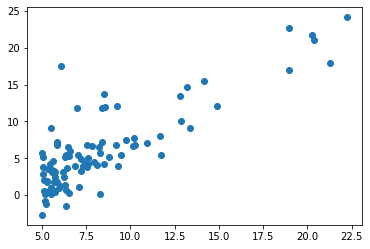

In [3]:
X = data.iloc[:,0]                 # Allocating 1st data col
y = data.iloc[:,1]                 # Allocating 2nd data col

plt.scatter(X,y)                   # Visulaizing data

m = X.shape[0]                     # Number of test-cases
X = np.c_[np.ones((m, 1)), X]      # Appending a column of ones in X ->bias
y = y[:, np.newaxis]               # Converting y from a vector(m x ,) to matrix(m x 1)
theta = np.zeros((2,1))            # Initialising theta vector

### The Hypothesis function

In [4]:
def _h(theta, X):
    # h = theta0*x0 + theta1*x1 + theta2*x2... or theta.X
    
    h = np.dot(X,theta)
    
    return h

### Gradient Descent

In [5]:
def gradDes(X, y, theta, alpha, max_iter = 100):
    m = X.shape[0]
    
    for _ in range(max_iter):
        h = _h(theta, X)     #update hypothesis every time when theta changes
        
        theta = theta - (alpha/m)*(np.sum(((h-y) * X), axis = 0).reshape(theta.shape[0], 1))
        # sum returns a row vector, hence reshaping
    
    return theta

### Testing for optimal parameters for given dataset

In [6]:
params1 = gradDes(X,y, theta,0.001, 100)
params2 = gradDes(X,y, theta,0.001, 1000)
params3 = gradDes(X,y, theta,0.001, 10000)

theta = np.zeros((2,1))                           # Resetting theta to zeros
params4 = gradDes(X,y, theta,0.01, 100)
params5 = gradDes(X,y, theta,0.01, 1000)
params6 = gradDes(X,y, theta,0.01, 10000)

theta = np.zeros((2,1))                           # Resetting theta to zeros 
params7 = gradDes(X,y, theta,0.03, 100)
params8 = gradDes(X,y, theta,0.03, 1000)
params9 = gradDes(X,y, theta,0.03, 10000)

theta = np.zeros((2,1))                           # Resetting theta to zeros
params10 = gradDes(X,y, theta,0.02, 100)
params11 = gradDes(X,y, theta,0.02, 1000)
params12 = gradDes(X,y, theta,0.02, 10000)

/home/hackme199/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/hackme199/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in subtract
  import sys


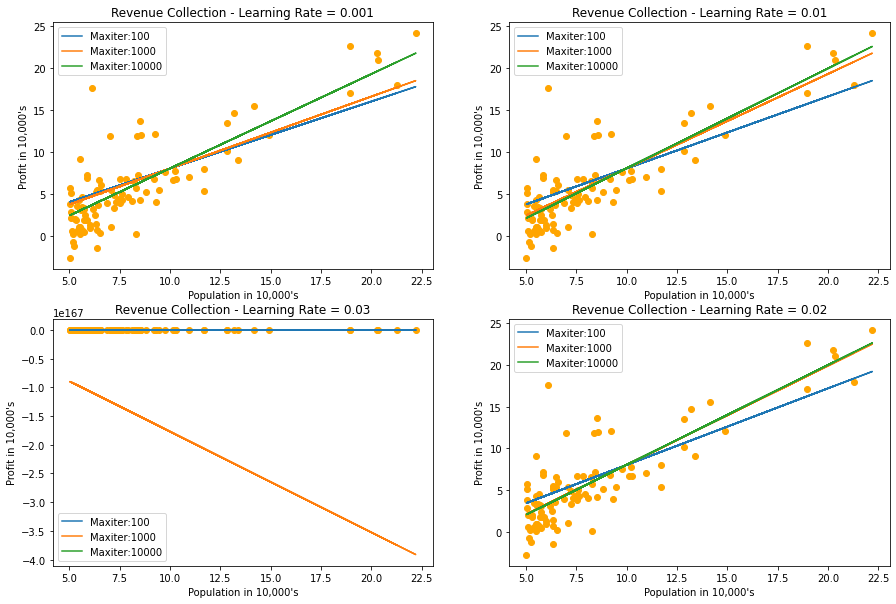

In [7]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.subplot(2, 2, 1)
plt.scatter(X[:,1],y, color="orange")
plt.title("Revenue Collection - Learning Rate = 0.001")
plt.xlabel("Population in 10,000's")
plt.ylabel("Profit in 10,000's")
plt.plot(X[:,1],_h(params1, X), linestyle='-', label= "Maxiter:100")
plt.plot(X[:,1],_h(params2, X), linestyle='-', label= "Maxiter:1000")
plt.plot(X[:,1],_h(params3, X), linestyle='-', label= "Maxiter:10000")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(X[:,1],y, color="orange")
plt.title("Revenue Collection - Learning Rate = 0.01")
plt.xlabel("Population in 10,000's")
plt.ylabel("Profit in 10,000's")
plt.plot(X[:,1],_h(params4, X), linestyle='-', label= "Maxiter:100")
plt.plot(X[:,1],_h(params5, X), linestyle='-', label= "Maxiter:1000")
plt.plot(X[:,1],_h(params6, X), linestyle='-', label= "Maxiter:10000")
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(X[:,1],y, color="orange")
plt.title("Revenue Collection - Learning Rate = 0.03")
plt.xlabel("Population in 10,000's")
plt.ylabel("Profit in 10,000's")
plt.plot(X[:,1],_h(params7, X), linestyle='-', label= "Maxiter:100")
plt.plot(X[:,1],_h(params8, X), linestyle='-', label= "Maxiter:1000")
plt.plot(X[:,1],_h(params9, X), linestyle='-', label= "Maxiter:10000")
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(X[:,1],y, color="orange")
plt.title("Revenue Collection - Learning Rate = 0.02")
plt.xlabel("Population in 10,000's")
plt.ylabel("Profit in 10,000's")
plt.plot(X[:,1],_h(params10, X), linestyle='-', label= "Maxiter:100")
plt.plot(X[:,1],_h(params11, X), linestyle='-', label= "Maxiter:1000")
plt.plot(X[:,1],_h(params12, X), linestyle='-', label= "Maxiter:10000")
plt.legend()



### Deciding Optimal parameter set

In [8]:
# Observing the above 4 graphs, we notice that optimal
# value for LEARNING RATE lies between 0.001 - 0.02, 
# clinging towards 0.02 while MAX_ITERATIONS conforms
# to a value close to 100

"""OPTIMAL PARAMETER SET"""
"""----> params10 <-----"""

'----> params10 <-----'

### Testing our Model

In [12]:
x_test = np.array([[1, 10]])

h = _h(params10, x_test)
res = str(h[0][0])
print("Estimated profit at " , str(x_test[0][1]) , "K population = " + res + " K")


Estimated profit at  10 K population = 8.021788376362966 K
